<a href="https://colab.research.google.com/github/poeala/CoderHouse-Data-Science-2/blob/main/Data_StoryTellingAndrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import requests
import time


Abstracto: Motivaci√≥n y Audiencia

Este proyecto tiene como objetivo explorar las caracter√≠sticas de los Pok√©mon de la primera generaci√≥n a partir de un conjunto de datos p√∫blico, enriquecido con informaci√≥n adicional proveniente de la API oficial de PokeAPI. Se busca analizar patrones, relaciones entre atributos y extraer insights que permitan entender mejor c√≥mo se distribuyen las estad√≠sticas clave como ataque, velocidad, defensa o habilidades especiales entre los diferentes tipos y formas evolutivas.

La motivaci√≥n principal detr√°s de este an√°lisis es aprender a aplicar herramientas de ciencia de datos sobre un conjunto de datos divertido, limpio y con alto potencial para la exploraci√≥n y la predicci√≥n. Adem√°s, se incorpora el uso de APIs p√∫blicas como recurso de enriquecimiento de datos, una habilidad fundamental en proyectos reales de an√°lisis.

La audiencia esperada incluye:

*‚óã Estudiantes de ciencia de datos: * que est√©n aprendiendo sobre an√°lisis exploratorio, ingenier√≠a de caracter√≠sticas y modelado predictivo.
*‚óã Desarrolladores de videojuegos: * interesados en comprender c√≥mo las estad√≠sticas de personajes pueden influir en el balance del juego.
*‚óã Fan√°ticos de Pok√©mon: * con curiosidad por descubrir qu√© caracter√≠sticas hacen que un Pok√©mon sea m√°s "legendario".

En etapas posteriores, tambi√©n se busca entrenar modelos de clasificaci√≥n para predecir si un Pok√©mon es legendario en base a sus atributos num√©ricos, analizando el rendimiento de distintos enfoques.

El dataset contiene informaci√≥n de 721 Pok√©mon ‚Äîcon atributos como stats b√°sicos (HP, Ataque, Defensa, Speed, etc.), tipo primario y secundario, generaci√≥n y si son legendarios.  https://www.kaggle.com/datasets/abcsds/pokemon

 Preguntas / Hip√≥tesis a responder

A partir del dataset de Pok√©mon (primera generaci√≥n ampliada con datos desde PokeAPI), se plantean las siguientes preguntas clave para el an√°lisis:

1. **¬øLos Pok√©mon legendarios tienen realmente mejores stats promedios que los no legendarios?**  
   Se busca evaluar si el atributo "legendario" se corresponde con valores significativamente superiores en estad√≠sticas como ataque, defensa, velocidad o total general de puntos.

2. **¬øQu√© combinaci√≥n de tipos (`Type 1` + `Type 2`) es m√°s frecuente y cu√°l tiene mejores stats promedio?**  
   El objetivo es identificar qu√© combinaciones de tipos elementales (como Agua + Volador o Planta + Veneno) se repiten con mayor frecuencia y cu√°les tienden a tener mejores desempe√±os generales en t√©rminos de sus estad√≠sticas base.

3. **¬øLos Pok√©mon son m√°s lentos mientras m√°s pesados son?**  
   El objetivo es identificar si los Pok√©mon livianos son m√°s √°giles o r√°pidos.


Estas preguntas guiar√°n el an√°lisis exploratorio y las visualizaciones, y permitir√°n generar insights relevantes sobre el balance, diversidad y poder relativo entre las distintas especies del universo Pok√©mon.


Carga, limpieza y transformaci√≥n de los datos

Los datos utilizados en este proyecto provienen de un dataset p√∫blico de Kaggle que contiene informaci√≥n detallada sobre 721 Pok√©mon, incluyendo estad√≠sticas base (`HP`, `Ataque`, `Defensa`, `Sp. Atk`, `Sp. Def`, `Speed`), tipo elemental primario y secundario, generaci√≥n, clasificaci√≥n como "legendario" o no, entre otros atributos.

Carga de los datos

Los datos fueron importados desde un archivo CSV (`pokemon.csv`) utilizando la biblioteca `pandas`. Adem√°s, para enriquecer la informaci√≥n, se incorporaron datos desde la API oficial de Pok√©mon (`https://pokeapi.co`), tales como:

- **Altura (metros)**  
- **Peso (kg)**  
- **Cantidad de habilidades**  

La API fue consultada din√°micamente utilizando la biblioteca `requests`.

Limpieza

Se realizaron los siguientes pasos de limpieza:

- Estandarizaci√≥n de nombres de columnas para evitar errores (`snake_case`, sin espacios).
- Revisi√≥n de valores nulos.
- Conversi√≥n de variables categ√≥ricas a formato adecuado (`boolean`, `category`).
- Correcci√≥n de nombres incompatibles con la API (por ejemplo: `'Nidoran‚ôÄ' ‚Üí 'nidoran-f'`).

Transformaciones y columnas creadas

Se crearon nuevas columnas derivadas de los datos originales o enriquecidos:

- `indice_ofensivo`: producto entre `Attack` y `Sp. Atk`  
- `tipo_combinado`: combinaci√≥n de `Type 1` + `Type 2` para an√°lisis conjunto de tipos  
- `altura_api`, `peso_api`, `n_habilidades_api`: datos provenientes de PokeAPI

Estas transformaciones permiten realizar an√°lisis m√°s ricos sobre rendimiento, caracter√≠sticas f√≠sicas y potencial de combate de los Pok√©mon, y ser√°n utilizadas en las visualizaciones posteriores para responder las preguntas planteadas.


In [46]:


# Descarga de la √∫ltima versi√≥n del datset
path = kagglehub.dataset_download("abcsds/pokemon")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pokemon


In [47]:
# Se movi√≥ el dataset a una carpeta con mayor compatibilidad para ediciones
!cp /kaggle/input/pokemon/Pokemon.csv /content/


In [48]:

df = pd.read_csv("/content/Pokemon.csv")
df.head()


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [49]:


# Cargar el dataset completo
df = pd.read_csv("Pokemon.csv")

# Diccionario para corregir nombres especiales para la API
correcciones = {
    'Mr. Mime': 'mr-mime',
    'Farfetch‚Äôd': 'farfetchd',
    'Nidoran‚ôÄ': 'nidoran-f',
    'Nidoran‚ôÇ': 'nidoran-m',
    'Flab√©b√©': 'flabebe',
    'Type: Null': 'type-null',
    'Mime Jr.': 'mime-jr',
    'Ho-Oh': 'ho-oh',
    'Porygon-Z': 'porygon-z'
}

# Funci√≥n para consultar la API y obtener altura, peso y habilidades
def consultar_pokeapi(nombre_pokemon):
    nombre_api = correcciones.get(
        nombre_pokemon,
        nombre_pokemon.lower().replace(" ", "-").replace(".", "").replace("'", "").replace("‚ôÄ", "-f").replace("‚ôÇ", "-m")
    )
    url = f'https://pokeapi.co/api/v2/pokemon/{nombre_api}'

    try:
        r = requests.get(url)
        if r.status_code == 200:
            data = r.json()
            altura = data['height'] / 10  # dec√≠metros ‚Üí metros
            peso = data['weight'] / 10    # hectogramos ‚Üí kg
            habilidades = len(data['abilities'])
            return pd.Series([altura, peso, habilidades])
        else:
            return pd.Series([None, None, None])
    except:
        return pd.Series([None, None, None])

# Aplicar a todos los Pok√©mon
df[['altura_api', 'peso_api', 'n_habilidades_api']] = df['Name'].apply(consultar_pokeapi)

# Guardar resultados
df.to_csv("Pokemon_enriquecido.csv", index=False)

# Ver una muestra
df[['Name', 'altura_api', 'peso_api', 'n_habilidades_api']].head()


Name  altura_api  peso_api  n_habilidades_api
0              Bulbasaur         0.7       6.9                2.0
1                Ivysaur         1.0      13.0                2.0
2               Venusaur         2.0     100.0                2.0
3  VenusaurMega Venusaur         NaN       NaN                NaN
4             Charmander         0.6       8.5                2.0

In [50]:
# Ver principio y fin del csv
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
df


#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  altura_api  peso_api  \
0         65       65     45           1      False         0.7       6.9   
1         80       80     60           1      False         1.0      13.0   
2        100      100     80           1      False         2.0     100.0   
3        122      120     80           1      False         NaN       NaN   
4         60       50     65           1      False         0.6       8.5   
..       ...      ...    ...         ...        ...         ...       ...   
795      100      150     50           6       True         0.7       8.8   
796      160      110    110           6       True         NaN       NaN   
797      150      130     70           6       True         NaN       NaN   
798      170      130     80           6       True         NaN       NaN   
799      130       90     70           6       True         1.7     195.0   

     n_habilidades_api  
0                  2.0  
1                  2.0  
2                  2.0  
3                  NaN  
4                  2.0  
..                 ...  
795                1.0  
796                NaN  
797                NaN  
798                NaN  
799                1.0  

[800 rows x 16 columns]

In [51]:
#Imprimir nombres de columnas
print(df.columns.tolist())


['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'altura_api', 'peso_api', 'n_habilidades_api']


In [52]:
# Diccionario para renombrar las columnas
df.columns = [
    'id',
    'name',
    'type_1',
    'type_2',
    'total',
    'hp',
    'attack',
    'defense',
    'sp_atk',
    'sp_def',
    'speed',
    'generation',
    'legendary',
    'altura_api',
    'peso_api',
    'n_habilidades_api'
]

# Verificar el cambio
df.head()
df.dtypes

id                     int64
name                  object
type_1                object
type_2                object
total                  int64
hp                     int64
attack                 int64
defense                int64
sp_atk                 int64
sp_def                 int64
speed                  int64
generation             int64
legendary               bool
altura_api           float64
peso_api             float64
n_habilidades_api    float64
dtype: object

In [53]:
# Crear columna √≠ndice ofensivo: Attack * Sp. Atk
df["indice_ofensivo"] = df["attack"] * df["sp_atk"]


In [54]:
#Tratamiento de nulos
df['type_2'] = df['type_2'].fillna("None")  # o "Sin tipo secundario"




In [55]:
# Eliminar nulos y asegurar tipo de datos
df = df.dropna(subset=['peso_api', 'altura_api', 'n_habilidades_api'])

df['peso_api'] = df['peso_api'].astype(float)
df['altura_api'] = df['altura_api'].astype(float)
df['n_habilidades_api'] = df['n_habilidades_api'].astype(int)


/tmp/ipython-input-3267088764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peso_api'] = df['peso_api'].astype(float)
/tmp/ipython-input-3267088764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['altura_api'] = df['altura_api'].astype(float)
/tmp/ipython-input-3267088764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [56]:
# Ver si qued√≥ alg√∫n nulo
df.isnull().sum()
#Ver cuantas filas y columnas quedaron
df.shape


(704, 17)

In [58]:
df.dtypes

id                     int64
name                  object
type_1                object
type_2                object
total                  int64
hp                     int64
attack                 int64
defense                int64
sp_atk                 int64
sp_def                 int64
speed                  int64
generation             int64
legendary               bool
altura_api           float64
peso_api             float64
n_habilidades_api      int64
indice_ofensivo        int64
dtype: object

/tmp/ipython-input-178119975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


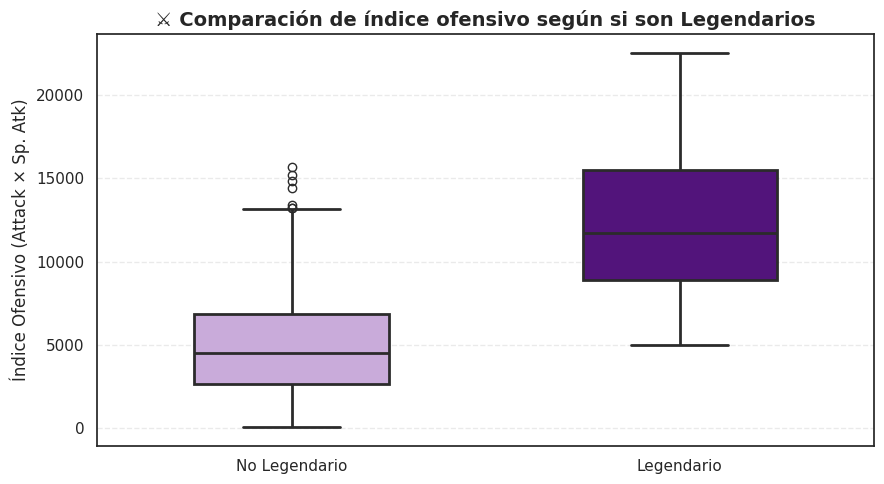

In [60]:


colores = {'False': '#CBA3E2', 'True': '#55038C'}

plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x='legendary',
    y='indice_ofensivo',
    palette=colores,
    width=0.5,
    linewidth=2
)

plt.title("‚öîÔ∏è Comparaci√≥n de √≠ndice ofensivo seg√∫n si son Legendarios", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("√çndice Ofensivo (Attack √ó Sp. Atk)", fontsize=12)
plt.xticks([0, 1], ['No Legendario', 'Legendario'], fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1010950472.py:28: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


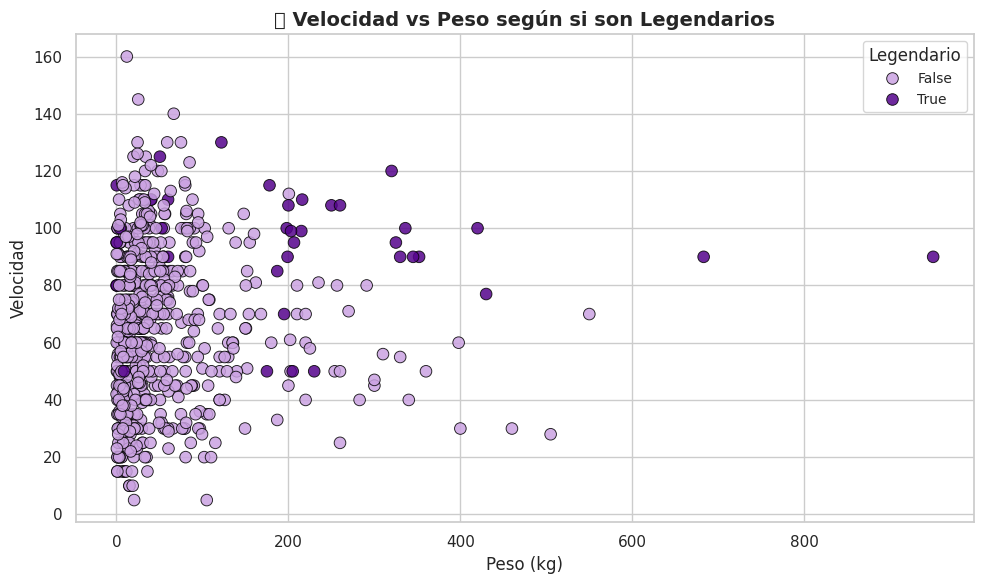

peso_api  altura_api     speed     total
peso_api    1.000000    0.637686  0.103628  0.543320
altura_api  0.637686    1.000000  0.221511  0.529319
speed       0.103628    0.221511  1.000000  0.537483
total       0.543320    0.529319  0.537483  1.000000

In [69]:
# Paleta violeta clara para no legendarios, violeta fuerte para legendarios
colores = {False: '#CBA3E2', True: '#55038C'}

# Crear figura
plt.figure(figsize=(10, 6))

# Scatterplot
sns.scatterplot(
    data=df,
    x='peso_api',
    y='speed',
    hue='legendary',
    palette=colores,
    edgecolor='black',
    s=70,
    alpha=0.85
)

# T√≠tulos y etiquetas
plt.title("üí® Velocidad vs Peso seg√∫n si son Legendarios", fontsize=14, fontweight='bold')
plt.xlabel("Peso (kg)", fontsize=12)
plt.ylabel("Velocidad", fontsize=12)

# Leyenda
plt.legend(title="Legendario", title_fontsize=12, fontsize=10, loc="upper right")

plt.grid(True)
plt.tight_layout()
plt.show()

df[['peso_api', 'altura_api', 'speed', 'total']].corr()

El gr√°fico de dispersi√≥n muestra la relaci√≥n entre el peso y la velocidad de los Pok√©mon, diferenciando si son legendarios o no.

**Conclusiones:**
- La **correlaci√≥n entre peso y velocidad es baja (r ‚âà 0.10)**, lo que indica que el peso **no es un buen predictor** de la velocidad.
- Pok√©mon muy livianos presentan una amplia variabilidad en velocidad.
- Existen Pok√©mon muy pesados con velocidades altas, especialmente entre los legendarios, lo cual contradice la creencia de que los Pok√©mon pesados son necesariamente lentos.
- El patr√≥n sugiere que la **velocidad est√° m√°s influenciada por otros atributos** del juego (tipo, rol, generaci√≥n) y no tanto por caracter√≠sticas f√≠sicas como el peso.

/tmp/ipython-input-2279756386.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


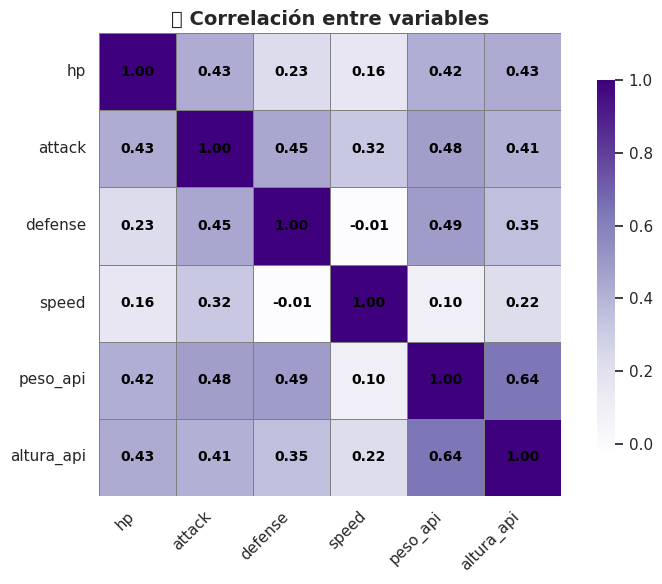

In [37]:
# Matriz de correlaci√≥n
corr = df[['hp', 'attack', 'defense', 'speed', 'peso_api', 'altura_api']].corr()

# Tama√±o y estilo
plt.figure(figsize=(8, 6))
sns.set(style="white")

# Heatmap con paleta violeta personalizada
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="Purples",
    square=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title("üîç Correlaci√≥n entre variables", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlaci√≥n entre variables

- Existe una **fuerte correlaci√≥n positiva entre peso y altura** (`r = 0.64`), como era esperable.
- El peso tambi√©n se asocia moderadamente con **Attack (0.48)**, **Defense (0.49)** y **HP (0.42)**, lo que indica que Pok√©mon m√°s pesados tienden a ser m√°s resistentes y fuertes f√≠sicamente.
- **Speed tiene muy baja correlaci√≥n** con el resto de las variables, especialmente con peso (`r = 0.10`), desmintiendo la idea de que los Pok√©mon m√°s pesados necesariamente son m√°s lentos.
- Las estad√≠sticas ofensivas (`Attack`, `Sp. Atk`) y defensivas est√°n parcialmente relacionadas entre s√≠.

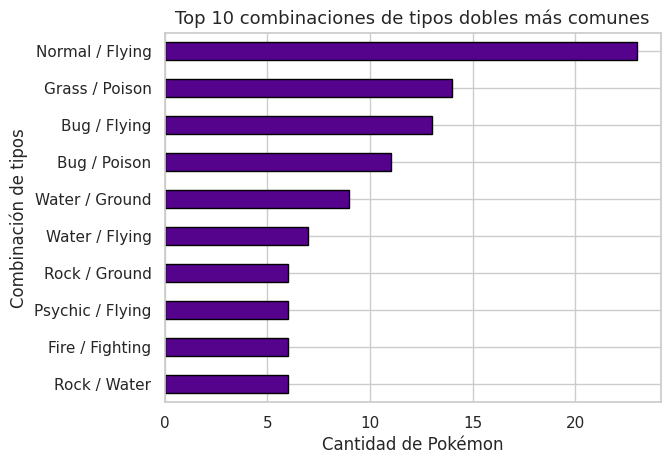

tipo_combinado
Normal / Flying      23
Grass / Poison       14
Bug / Flying         13
Bug / Poison         11
Water / Ground        9
                     ..
Fighting / Dark       1
Poison / Dragon       1
Fighting / Flying     1
Electric / Fairy      1
Fire / Water          1
Name: count, Length: 123, dtype: int64


In [63]:
# Filtrar Pok√©mon que tienen tipo secundario (es decir, no nulo)
df_dobles = df[df['type_2'] != "None"].copy()

# Crear la columna combinada solo para los que tienen ambos tipos
df_dobles['tipo_combinado'] = df_dobles['type_1'] + ' / ' + df_dobles['type_2']

# Contar combinaciones m√°s comunes
top_combos_dobles = df_dobles['tipo_combinado'].value_counts().head(10)

# Graficar
top_combos_dobles.plot(kind='barh', color='#55038C', edgecolor='black')
plt.title("Top 10 combinaciones de tipos dobles m√°s comunes", fontsize=13)
plt.xlabel("Cantidad de Pok√©mon")
plt.ylabel("Combinaci√≥n de tipos")
plt.gca().invert_yaxis()
plt.show()
tipo_combinado_counts = df_dobles['tipo_combinado'].value_counts()
print(tipo_combinado_counts)

El gr√°fico muestra las combinaciones de tipos elementales m√°s frecuentes entre los Pok√©mon que tienen **dos tipos** (excluyendo aquellos con solo un tipo).

- `Normal / Flying` es la combinaci√≥n m√°s com√∫n, representando a muchas especies de aves (como Pidgey, Swellow o Staraptor).
- Le siguen combinaciones comunes en generaciones tempranas como `Grass / Poison` y `Bug / Poison`, t√≠picas de Pok√©mon tipo planta o insecto con habilidades venenosas.
- Otras combinaciones como `Water / Flying` y `Rock / Ground` tambi√©n son frecuentes y reflejan l√≠neas evolutivas consistentes dentro del juego.

                      hp  attack  defense  sp_atk  sp_def  speed  total
tipo_combinado                                                         
Dragon / Fire      100.0   120.0    100.0   150.0   120.0   90.0  680.0
Dragon / Electric  100.0   150.0    120.0   120.0   100.0   90.0  680.0
Steel / Dragon     100.0   120.0    120.0   150.0   100.0   90.0  680.0
Dragon / Ice       125.0   130.0     90.0   130.0    90.0   95.0  660.0
Water / Dragon      82.5   107.5     97.5   122.5   107.5   92.5  610.0
Dragon / Psychic    80.0    85.0     85.0   120.0   120.0  110.0  600.0
Fire / Water        80.0   110.0    120.0   130.0    90.0   70.0  600.0
Psychic / Fire     100.0   100.0    100.0   100.0   100.0  100.0  600.0
Rock / Dark        100.0   134.0    110.0    95.0   100.0   61.0  600.0
Fire / Steel        91.0    90.0    106.0   130.0   106.0   77.0  600.0


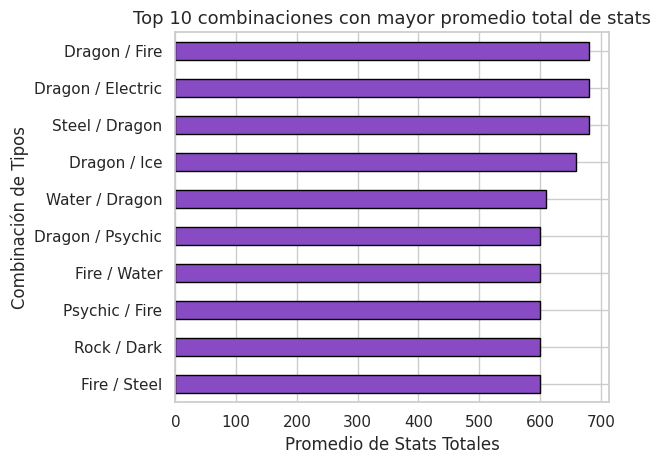

In [68]:
# Calcular stats promedio por combinaci√≥n
promedios_stats = df_dobles.groupby('tipo_combinado')[['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'total']].mean()

# Ordenar por stat total promedio
mejores_combinaciones = promedios_stats.sort_values(by='total', ascending=False).head(10)
print(mejores_combinaciones)
mejores_combinaciones['total'].plot(kind='barh', color='#884BC4', edgecolor='black')
plt.title("Top 10 combinaciones con mayor promedio total de stats", fontsize=13)
plt.xlabel("Promedio de Stats Totales")
plt.ylabel("Combinaci√≥n de Tipos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Las combinaciones con mejores stats promedio est√°n encabezadas por:

Dragon / Fire

Dragon / Electric

Steel / Dragon

Dragon / Ice

Estas combinaciones tienen un promedio total de stats cercano a 680, lo que es muy superior al promedio general de Pok√©mon no legendarios (que ronda los 400‚Äì500 en muchos casos).

Los Pok√©mon con combinaciones que incluyen el tipo Dragon (ya sea con Fire, Electric, Steel, Ice, etc.) tienden a tener los mejores valores promedio de stats totales.

Esto sugiere que el tipo Dragon est√° altamente asociado con Pok√©mon poderosos, en especial en combinaciones ofensivas (Sp. Atk y Attack muy altos).

Estas combinaciones probablemente incluyan muchos Pok√©mon legendarios, lo que podr√≠a influir en su alto promedio de stats.

/tmp/ipython-input-1487890197.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='generation', y='total', palette='Purples_r', ci='sd')
/tmp/ipython-input-1487890197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='generation', y='total', palette='Purples_r', ci='sd')


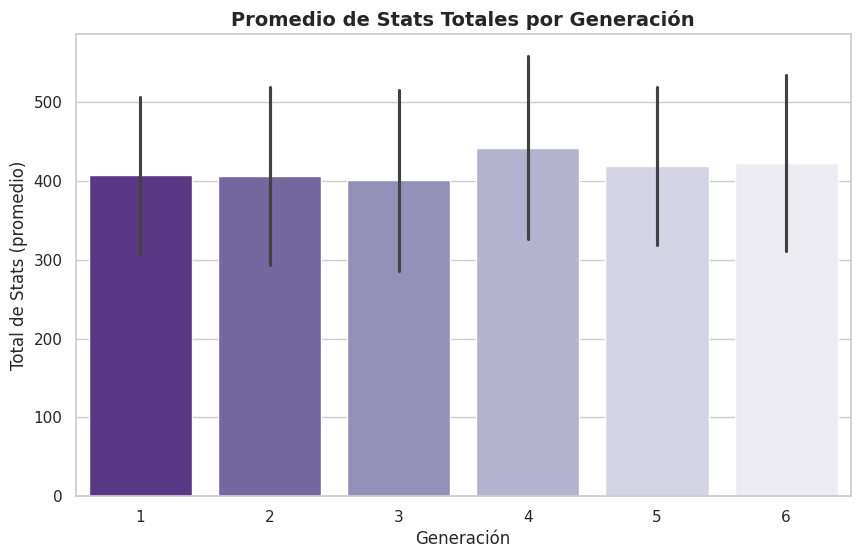

In [35]:
# Estilo
sns.set(style="whitegrid")

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='generation', y='total', palette='Purples_r', ci='sd')
color = "#884bc4"
# T√≠tulos y etiquetas
plt.title("Promedio de Stats Totales por Generaci√≥n", fontsize=14, fontweight='bold')
plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("Total de Stats (promedio)", fontsize=12)
plt.xticks(ticks=range(0, 6), labels=["1", "2", "3", "4", "5", "6"])
plt.show()



Promedio de Stats Totales por Generaci√≥n

Se observa que el promedio de stats totales de los Pok√©mon se mantiene relativamente estable entre generaciones, con valores entre 400 y 450.
La Generaci√≥n 4 destaca con un promedio m√°s alto, lo cual podr√≠a deberse a la introducci√≥n de nuevas evoluciones de Pok√©mon previos y un aumento en la cantidad de legendarios.
Esta informaci√≥n es √∫til para analizar el balance del juego a lo largo del tiempo, y podr√≠a ser clave si se entrena un modelo predictivo sensible a la generaci√≥n.

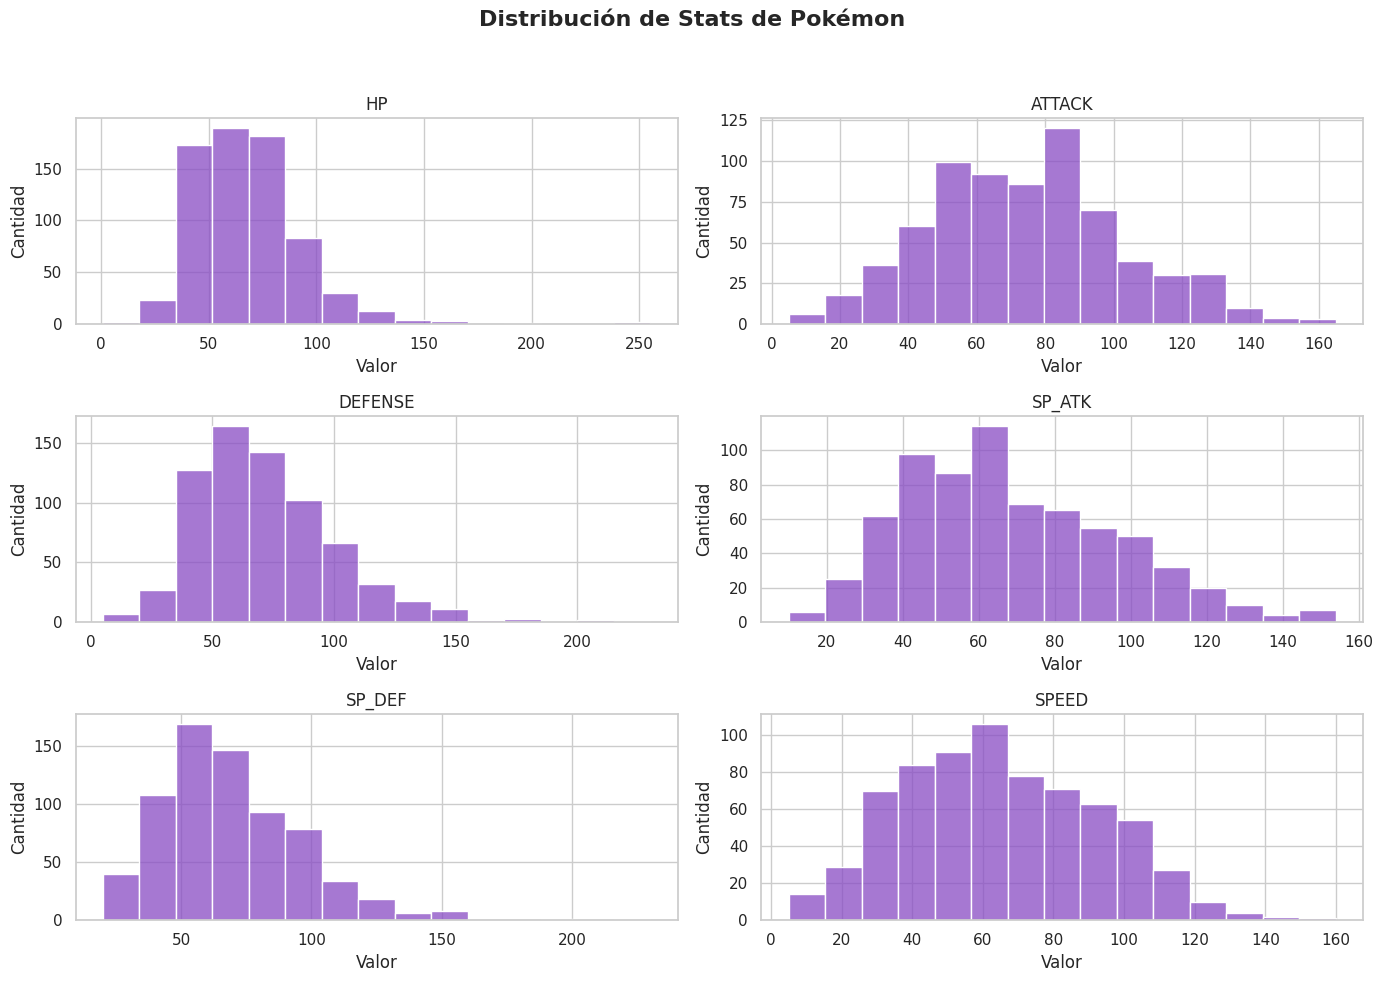

In [61]:
# Estilo de Seaborn
sns.set_style("whitegrid")

# Variables a graficar (agregamos ataque y defensa especial)
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']

# Crear figura con 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle("Distribuci√≥n de Stats de Pok√©mon", fontsize=16, fontweight='bold')

# Color personalizado
color = "#884bc4"

# Histograma para cada stat
for ax, stat in zip(axes.flatten(), stats):
    sns.histplot(df[stat], bins=15, kde=False, color=color, ax=ax)
    ax.set_title(stat.upper(), fontsize=12)
    ax.set_xlabel("Valor")
    ax.set_ylabel("Cantidad")

# Ajuste de dise√±o
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Distribuci√≥n de Stats

Los histogramas muestran c√≥mo se distribuyen las principales estad√≠sticas de los Pok√©mon (HP, Ataque, Defensa y Velocidad, Ataque especial y Defensa especial).  
Se observa que:

La mayor√≠a de los stats tienen distribuciones concentradas en rangos medios (50‚Äì80), con algunos valores extremos hacia arriba, probablemente correspondientes a Pok√©mon legendarios o de √©lite.

Ataque, Ataque Especial y Velocidad tienen distribuciones algo m√°s extendidas, sugiriendo mayor variabilidad entre especies.

HP y Defensa(s) muestran sesgo positivo, indicando muchos Pok√©mon con valores bajos a medios, y pocos con valores muy altos.

Estos patrones sugieren que los Pok√©mon est√°n dise√±ados con un balance en los valores intermedios, y solo unos pocos presentan stats extremos.

Conclusiones finales:

Los Pok√©mon legendarios presentan, en promedio, valores significativamente m√°s altos en todos los stats principales (ataque, velocidad, etc.), lo que valida la etiqueta de "legendario".

Las combinaciones de tipo m√°s comunes fueron Normal / Flying y Bug / Poison, lo que refleja tendencias en el dise√±o de Pok√©mon de generaciones iniciales.

No se encontr√≥ una fuerte relaci√≥n entre peso y velocidad, ya que algunos Pok√©mon muy pesados tambi√©n tienen velocidad alta, posiblemente por dise√±o del juego.

El uso de la PokeAPI permiti√≥ enriquecer los datos de manera din√°mica, simulando una pr√°ctica real en proyectos de ciencia de datos.